In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import os
import tabulate
from tables import open_file

In [2]:
mpl.rcParams['font.size'] = 16

In [3]:
names_stack = [    'energy',
        'theta',
        'radius',
        'z']
dtype_stack = [(name, 'd') for name in names_stack]

In [4]:
def cumHist(data, bins = None):
    if bins is None:
        bins = np.sort(np.unique(data['z']))
    hist, _ = np.histogram(data['z'], bins=bins)
    return np.cumsum(hist[::-1]),np.abs(bins[::-1]-bins[-1])

In [5]:
def exp(x, b):
    a = 1
    c = 0
    return  a*np.exp(b*x)+c

In [34]:
path_no_pos = "/home/npm/data/sri-thunderstorm/oreshkin/no_positron_800_100/"
path_pos = "/home/npm/data/sri-thunderstorm/oreshkin/positron_700_100/"

In [35]:
def join_data(path):
    dirlis = os.listdir(path)
    data = []
    for it in dirlis:
        path_dir = os.path.join(path, it)
        if (os.path.isdir(path_dir)):
            data.append(
               np.fromfile(os.path.join(path_dir,"data", "electron.bin"), dtype=dtype_stack)
            )
    return np.hstack(data)
        

In [36]:
def join_data_number(path):
    dirlis = os.listdir(path)
    data = []
    for it in dirlis:
        path_dir = os.path.join(path, it)
        if (os.path.isdir(path_dir)):
            data.append(
               np.fromfile(os.path.join(path_dir,"data", "number.bin"), dtype="i")
            )
    return np.hstack(data)

In [37]:
data_no_pos = join_data(path_no_pos)
data_pos = join_data(path_pos)

In [38]:
data_no_pos_number = join_data_number(path_no_pos)
data_pos_number = join_data_number(path_pos)

In [49]:
bins_700 = np.linspace(-350, 350, 7001, endpoint=True)
bins_800 = np.linspace(-400, 400, 8001, endpoint=True)

In [50]:
bins_700

array([-350. , -349.9, -349.8, ...,  349.8,  349.9,  350. ])

In [53]:
hist_no_pos, bins_no_pos = cumHist(data_no_pos, bins_800)
hist_pos, bins_pos = cumHist(data_pos, bins_700)

In [46]:
bins_no_pos.shape

(13079033,)

In [48]:
800 / 0.1

8000.0

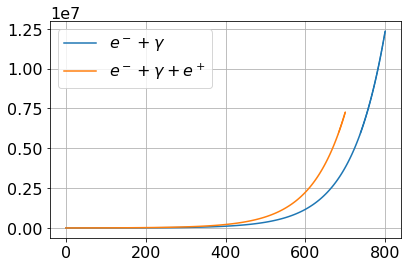

In [72]:
plt.step(bins_no_pos[:-1], hist_no_pos, label=r"$e^- + \gamma$")
plt.step(bins_pos[:-1], hist_pos, label=r"$e^- + \gamma + e^+$")
plt.grid(True)
plt.legend()
plt.tight_layout();

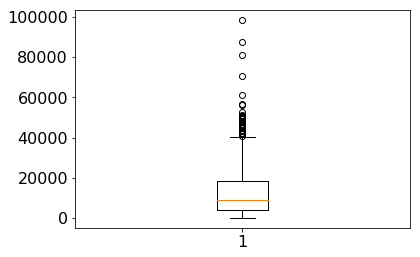

In [28]:
plt.boxplot(data_no_pos_number);

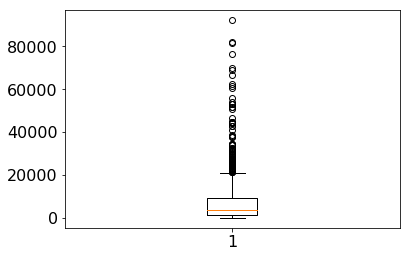

In [39]:
plt.boxplot(data_pos_number);

In [85]:
data_no_pos_number.std()/1000

12.243445547471962

In [118]:
def get_opt(hist, bins, number_of_particles=1000):
    x = 0.5*(bins[:-1] + bins[1:])
    y = hist/number_of_particles
#     p0 = (1/50,0)
    p0= (1/50)
    return curve_fit(exp, x,y, p0=p0)
    

In [123]:
popt_no_pos, pcov_no_pos  = get_opt(hist_no_pos, bins_no_pos)
popt_pos, pcov_no_pos = get_opt(hist_pos, bins_pos)

In [124]:
print(1/popt_no_pos[0], popt_no_pos, np.diag(pcov_no_pos))
print(1/popt_pos[0], popt_pos)

84.91639295649654 [0.01177629] [5.49010639e-13]
78.40600990194346 [0.01275412]


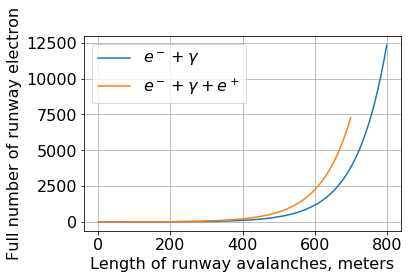

In [90]:
number_of_particles=1000

def get_xy(hist, bins):
    return 0.5*(bins[:-1] + bins[1:]), hist/number_of_particles

x, y = get_xy(hist_no_pos, bins_no_pos)
plt.plot(x, y, label=r"$e^- + \gamma$")

x, y = get_xy(hist_pos, bins_pos)
plt.plot(x, y, label=r"$e^- + \gamma + e^+$")

plt.xlabel("Length of runway avalanches, meters")
plt.ylabel("Full number of runway electron")
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.tight_layout()
plt.savefig("fitting.eps", foramt="eps")

In [89]:

l = np.array([1200, 1700, 2000, 4000, 5000])
result_no_pos = map(lambda x: "{:.1E}".format(x), exp(l, *popt_no_pos))
result_pos = map(lambda x: "{:.1E}".format(x), exp(l, *popt_pos))
print(tabulate.tabulate(zip(l, result_no_pos, result_pos),
        headers=["Length, m", "Number of runway electrons, without positron",
                "Number of runway electrons, with positron"], 
        tablefmt="latex"                   
                       ))

\begin{tabular}{rrr}
\hline
   Length, m &   Number of runway electrons, without positron &   Number of runway electrons, with positron \\
\hline
        1200 &                                        1.4e+06 &                                     4.3e+06 \\
        1700 &                                        5e+08   &                                     2.5e+09 \\
        2000 &                                        1.7e+10 &                                     1.2e+11 \\
        4000 &                                        2.9e+20 &                                     1.3e+22 \\
        5000 &                                        3.7e+25 &                                     4.5e+27 \\
\hline
\end{tabular}


In [126]:

l = np.array([1200, 1700, 2000, 4000, 5000])
result_no_pos = map(lambda x: "{:.1E}".format(x), exp(l, *popt_no_pos))
result_pos = map(lambda x: "{:.1E}".format(x), exp(l, *popt_pos))
print(tabulate.tabulate(zip(l, result_no_pos, result_pos),
        headers=["Length, m", "Number of runway electrons, without positron",
                "Number of runway electrons, with positron"], 
        tablefmt="latex"                   
                       ))

\begin{tabular}{rrr}
\hline
   Length, m &   Number of runway electrons, without positron &   Number of runway electrons, with positron \\
\hline
        1200 &                                        1.4e+06 &                                     4.4e+06 \\
        1700 &                                        4.9e+08 &                                     2.6e+09 \\
        2000 &                                        1.7e+10 &                                     1.2e+11 \\
        4000 &                                        2.9e+20 &                                     1.4e+22 \\
        5000 &                                        3.7e+25 &                                     5e+27   \\
\hline
\end{tabular}


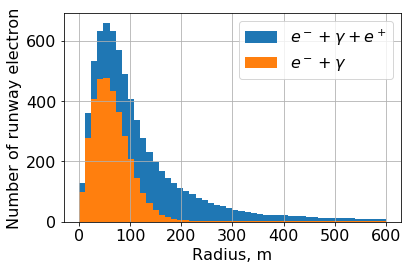

In [116]:
indx = data_no_pos['z'] > -300
bins = np.linspace(0, 600, 51, endpoint=True)
n = data_pos.shape[0]
plt.hist(data_pos['radius'],
         bins=bins,
         weights=np.repeat(1/1000, n),
         label=r"$e^- + \gamma + e^+$");
n = indx.sum()
plt.hist(data_no_pos['radius'][indx],
         bins=bins, 
         weights=np.repeat(1/1000, n),
         label=r"$e^- + \gamma$");
plt.grid(True);
plt.legend();
plt.ylabel("Number of runway electron")
plt.xlabel("Radius, m")
plt.tight_layout()
plt.savefig("radial.eps", foramt="eps")

# Количество частиц от энергии

In [7]:
path = "/home/zelenyy/storage/data/sri-thunderstorm/from_notebook/2017-YearReport/joinYearReport.hdf5"

In [10]:
with open_file(path) as h5file:
    data = h5file.get_node("/", "electronCellProduction").read()

In [12]:
print(data.dtype)

[('averageScored', '<f8'), ('electron', [('averageTime', '<f8'), ('energyOverMeVBins', '<f8', (21,)), ('energyThetaOverMeVHeigth', '<i4', (20, 20)), ('thetaOverMeVBins', '<f8', (21,)), ('timeBins', '<f8', (21,)), ('timeHeight', '<i4', (20,)), ('yieldParticle', '<i4'), ('yieldParticleOverMeV', '<i4'), ('yieldParticleOverMeVAside', '<i4'), ('zerosEnergyParticle', '<i4')]), ('gamma', [('averageTime', '<f8'), ('energyOverMeVBins', '<f8', (21,)), ('energyThetaOverMeVHeigth', '<i4', (20, 20)), ('thetaOverMeVBins', '<f8', (21,)), ('timeBins', '<f8', (21,)), ('timeHeight', '<i4', (20,)), ('yieldParticle', '<i4'), ('yieldParticleOverMeV', '<i4'), ('yieldParticleOverMeVAside', '<i4'), ('zerosEnergyParticle', '<i4')]), ('meta', [('dirName', 'S32'), ('direction', 'S32'), ('energy', '<f8'), ('fieldValueZ', '<f8'), ('height', '<i4'), ('number', '<i4'), ('particle', 'S8'), ('posZ', '<f8')]), ('positron', [('averageTime', '<f8'), ('energyOverMeVBins', '<f8', (21,)), ('energyThetaOverMeVHeigth', '<i4',

In [21]:
print(data["electron"].dtype)

[('averageTime', '<f8'), ('energyOverMeVBins', '<f8', (21,)), ('energyThetaOverMeVHeigth', '<i4', (20, 20)), ('thetaOverMeVBins', '<f8', (21,)), ('timeBins', '<f8', (21,)), ('timeHeight', '<i4', (20,)), ('yieldParticle', '<i4'), ('yieldParticleOverMeV', '<i4'), ('yieldParticleOverMeVAside', '<i4'), ('zerosEnergyParticle', '<i4')]


In [30]:
print(data["primary"].dtype)

[('averageTime', '<f8'), ('energyOverMeVBins', '<f8', (21,)), ('energyThetaOverMeVHeigth', '<i4', (20, 20)), ('thetaOverMeVBins', '<f8', (21,)), ('timeBins', '<f8', (21,)), ('timeHeight', '<i4', (20,)), ('yieldParticle', '<i4'), ('yieldParticleOverMeV', '<i4'), ('yieldParticleOverMeVAside', '<i4'), ('zerosEnergyParticle', '<i4')]


In [15]:
np.unique(data['meta']['direction'])

array([b'0 0 -1', b'0.5 0 -0.8660254', b'0.5 0 0.8660254',
       b'0.8660254 0 -0.5', b'1 0 0'],
      dtype='|S32')

In [16]:
np.unique(data['meta']['fieldValueZ'])

array([  5.00000000e-05,   1.00000000e-04,   1.50000000e-04,
         2.00000000e-04])

In [17]:
indx = (data['meta']['direction']==b"0 0 -1")*(data['meta']['fieldValueZ'] == 2.0e-4)

In [18]:
data[indx].shape

(300,)

In [19]:
np.unique(data['meta']['height'])

array([3000, 4000, 5000, 6000, 7000], dtype=int32)

In [20]:
np.unique(data['meta']['energy'])

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.])

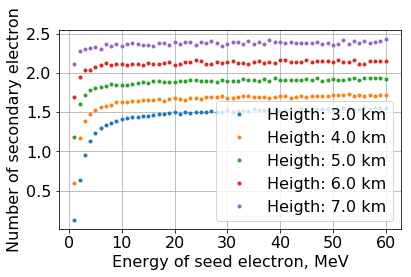

In [37]:
temp_data = data[indx]
heights = np.unique(data['meta']['height'])
for height in heights:
    indx_h = temp_data["meta"]["height"] == height
    x = temp_data["meta"]['energy'][indx_h]
    y = (temp_data["electron"]['yieldParticleOverMeV'][indx_h] + temp_data["primary"]['yieldParticleOverMeV'][indx_h] ) /temp_data["meta"]['number'][indx_h]
    plt.plot(x,y,'.', label="Heigth: {} km".format(height/1000))
             

plt.grid(True)
plt.legend();
plt.ylabel("Number of secondary electron")
plt.xlabel("Energy of seed electron, MeV")
plt.tight_layout()
plt.savefig("secondary.eps", foramt="eps")

In [36]:
(1/(2e-2*4e-4))/100

1249.9999999999998